<a href="https://colab.research.google.com/github/faturbg/data/blob/main/SURVEY%20BIAYAHIDUP%20MAHASISWA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

# Membaca data dari file Excel
file_path = '/content/drive/MyDrive/COLAB LIVINGCOST/data_biaya_hidup_mahasiswa2.xlsx'  # Ganti dengan path file Excel Anda
df = pd.read_excel(file_path)

# Menampilkan data untuk memeriksa formatnya
df.head()

,RESPONDEN,KOTA,UNIVERSITAS/INSTITUSI,RATA RATA BIAYA TINGGAL,RATA RATA BIAYA MAKAN,RATA RATA BIAYA TRANSPORT,PENUNJANG PERKULIAHAN,BIAYA KESEHATAN,HIBURAN,RATA RATA PENGHASILAN TAMBAHAN
0,1,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,725000,1300000,225000,475000,425000,750000,1500000
1,2,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,300000,780000,750000,475000,750000,425000,0
2,3,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,300000,780000,75000,437500,75000,225000,750000
3,4,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,975000,2080000,75000,437500,225000,750000,0
4,5,BALIKPAPAN,UNIVERSITAS BALIKPAPAN,200000,780000,425000,412500,750000,425000,750000


In [16]:
# Memeriksa data yang hilang
df.isnull().sum()

# Mengisi data yang hilang dengan nilai rata-rata kolom, hanya untuk kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns  # Seleksi kolom numerik
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [17]:
from sklearn.preprocessing import StandardScaler

# Menstandarisasi data
scaler = StandardScaler()
# Check the actual column names in your DataFrame using df.columns
print(df.columns)
# Adjust the features list to match the actual column names in your DataFrame and ONLY include numerical features
features = ['RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN','RATA RATA BIAYA TRANSPORT','PENUNJANG PERKULIAHAN','BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN']  # Perbaiki nama kolom jika diperlukan & exclude non-numerical features
df_scaled = scaler.fit_transform(df[features])

# Menampilkan data yang sudah diskalakan
df_scaled[:5]

Index(['RESPONDEN', 'KOTA', 'UNIVERSITAS/INSTITUSI', 'RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT',
       'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN'],
      dtype='object')


array([[ 1.55171128,  1.24022257,  0.20611655,  2.02991749,  2.02384727,
         3.01074696,  3.52283953],
       [-0.49673152, -0.05987281,  3.58008585,  2.02991749,  4.33976237,
         1.13211996, -0.39047308],
       [-0.49673152, -0.05987281, -0.75787468,  1.73780616, -0.47021515,
        -0.0239582 ,  1.56618322],
       [ 2.75667763,  3.19036565, -0.75787468,  1.73780616,  0.59866874,
         3.01074696, -0.39047308],
       [-0.97871807, -0.05987281,  1.49143818,  1.54306527,  4.33976237,
         1.13211996,  1.56618322]])

In [19]:
# Print the columns of your DataFrame to see the actual names
print(df.columns)

# Access the 'Kota' column using the actual name
# Replace 'ActualColumnName' with the actual name from the output above
df[['KOTA', 'Cluster']]

Index(['RESPONDEN', 'KOTA', 'UNIVERSITAS/INSTITUSI', 'RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT',
       'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'Cluster'],
      dtype='object')


,KOTA,Cluster
0,BALIKPAPAN,0
1,BALIKPAPAN,0
2,BALIKPAPAN,2
3,BALIKPAPAN,0
4,BALIKPAPAN,0
...,...,...
755,YOGYAKARTA,2
756,YOGYAKARTA,1
757,YOGYAKARTA,1
758,YOGYAKARTA,2


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Cluster']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Cluster')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

Index(['RESPONDEN', 'KOTA', 'UNIVERSITAS/INSTITUSI', 'RATA RATA BIAYA TINGGAL',
       'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT',
       'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN', 'Cluster'],
      dtype='object')


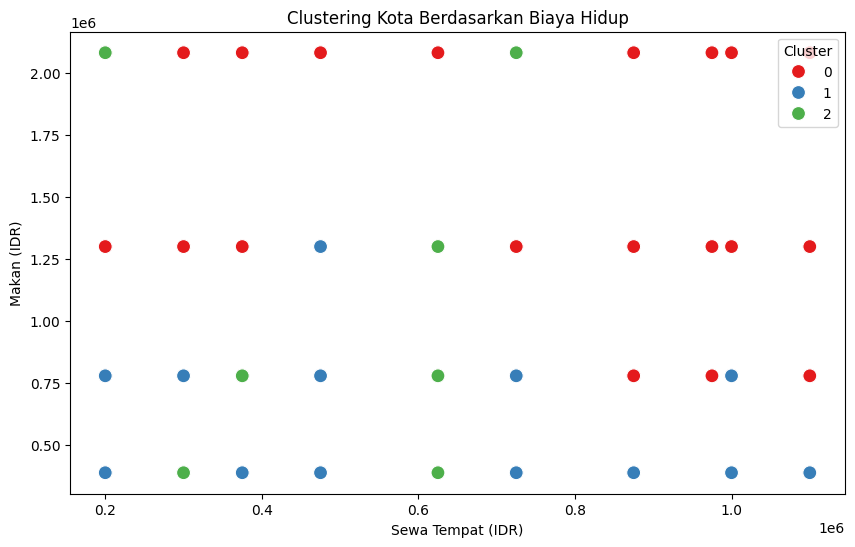

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the columns of your DataFrame to see the actual names
print(df.columns)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
# Replace 'Sewa_Tempat' and 'Makan' with the actual column names from your DataFrame
# For example, if the actual column name is 'sewa_tempat', use df['sewa_tempat'] instead of df['Sewa_Tempat']
sns.scatterplot(x=df['RATA RATA BIAYA TINGGAL'], y=df['RATA RATA BIAYA MAKAN'], hue=df['Cluster'], palette='Set1', s=100)
plt.title("Clustering Kota Berdasarkan Biaya Hidup")
plt.xlabel("Sewa Tempat (IDR)")
plt.ylabel("Makan (IDR)")
plt.show()

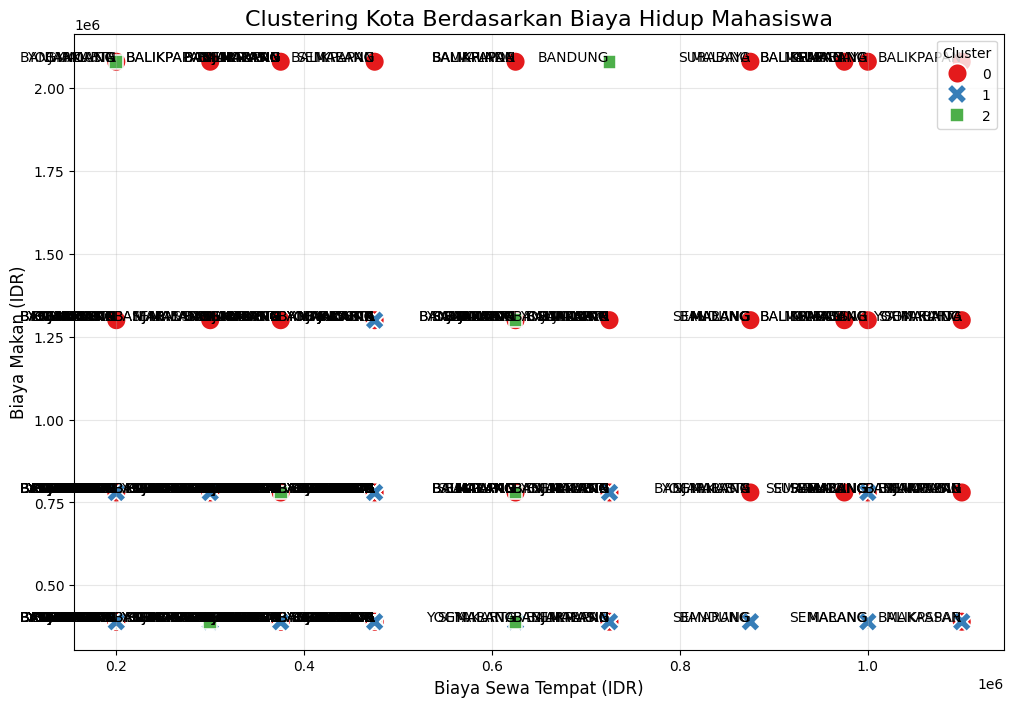

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



# Menstandarisasi data
features = ['RATA RATA BIAYA TINGGAL', 'RATA RATA BIAYA MAKAN', 'RATA RATA BIAYA TRANSPORT', 'PENUNJANG PERKULIAHAN', 'BIAYA KESEHATAN', 'HIBURAN',
       'RATA RATA PENGHASILAN TAMBAHAN']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=df['RATA RATA BIAYA TINGGAL'],
    y=df['RATA RATA BIAYA MAKAN'],
    hue=df['Cluster'],
    palette='Set1',
    s=200,
    style=df['Cluster']
)

# Menambahkan nama kota ke grafik
for i in range(df.shape[0]):
    plt.text(
        df['RATA RATA BIAYA TINGGAL'][i],
        df['RATA RATA BIAYA MAKAN'][i],
        df['KOTA'][i],
        fontsize=10,
        ha='right'
    )

# Menambahkan judul dan label
plt.title('Clustering Kota Berdasarkan Biaya Hidup Mahasiswa', fontsize=16)
plt.xlabel('Biaya Sewa Tempat (IDR)', fontsize=12)
plt.ylabel('Biaya Makan (IDR)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Cluster', fontsize=10)
plt.show()


Text(0.5, 0, 'Transportasi (IDR)')

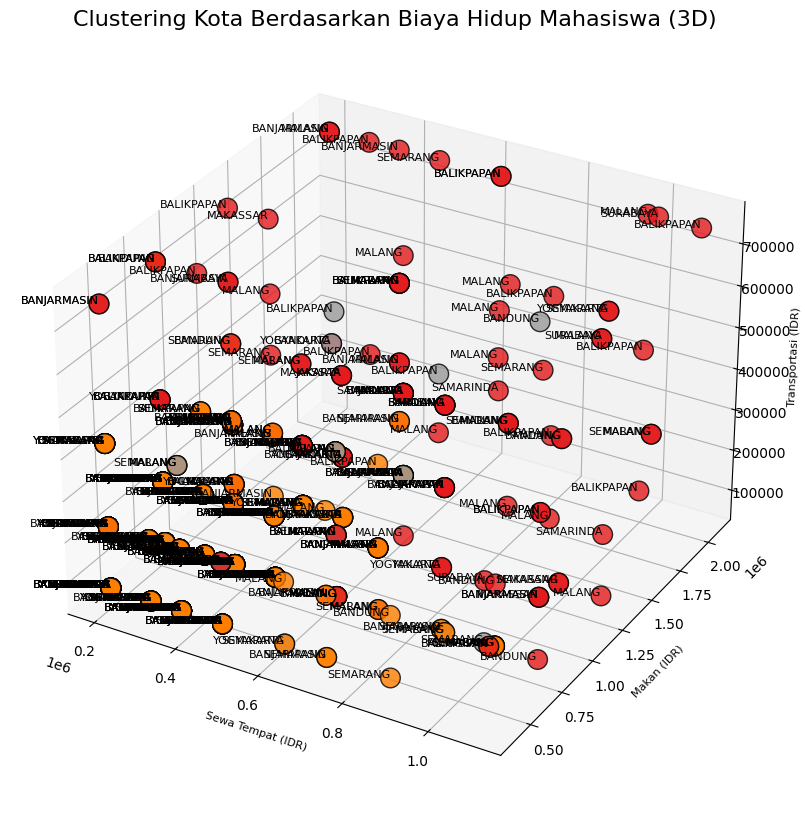

In [32]:
# @title Default title text
from mpl_toolkits.mplot3d import Axes3D

# Grafik 3D untuk visualisasi clustering
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Menentukan koordinat untuk visualisasi
x = df['RATA RATA BIAYA TINGGAL']
y = df['RATA RATA BIAYA MAKAN']
z = df['RATA RATA BIAYA TRANSPORT']
clusters = df['Cluster']

# Membuat scatter plot 3D
scatter = ax.scatter(
    x, y, z,
    c=clusters,
    cmap='Set1',
    s=200,
    edgecolor='k',
    alpha=0.8
)

# Menambahkan label untuk setiap titik
for i in range(df.shape[0]):
    ax.text(
        x[i], y[i], z[i],
        df['KOTA'][i],
        fontsize=8,
        ha='right'
    )

# Menambahkan label sumbu
ax.set_title('Clustering Kota Berdasarkan Biaya Hidup Mahasiswa (3D)', fontsize=16)
ax.set_xlabel('Sewa Tempat (IDR)', fontsize=8)
ax.set_ylabel('Makan (IDR)', fontsize=8)
ax.set_zlabel('Transportasi (IDR)', fontsize=8)

